# Cell Cycle Data

Import the cell cycle dataset excel spreadsheet (using Pandas). You may need to do some tidying of the data such as dropping rows with missing NaN values.

In [66]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_excel('Cell-Cycle-Set.xlsx')
# curate to drop columns with missing values
df.dropna(inplace=True)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 10)
df

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...
...,...,...,...,...,...,...,...,...,...,...
494,ALDH1B1,11.115773,11.158333,11.434383,26.024680,23.865020,26.095450,alcohol metabolic process;biological regulatio...,aldehyde dehydrogenase (NAD) activity;aldehyde...,cell part;cytoplasmic part;cytosol;intracellul...
495,MRPL12,11.251870,11.351043,11.255327,26.739813,24.989527,27.104197,alcohol biosynthetic process;alcohol metabolic...,binding;nucleic acid binding;protein binding;R...,cell part;cytoplasmic part;integral to membran...
496,NQO1,13.013263,13.179313,13.048477,28.422773,25.464497,28.879273,biological regulation;biosynthetic process;cel...,binding;catalytic activity;coenzyme binding;co...,cell part;cytoplasmic part;cytosol;intracellul...
497,IFIT3,9.048456,8.599903,9.105025,23.592930,19.960053,23.599087,biological regulation;cell surface receptor li...,binding;protein binding,cell part;cytoplasmic part;cytosol;intracellul...


# Week 1

## Task 1

Generate a histogram of one of the cell cycle stages of the RNA and protein distribution. Do you notice anything interesting with regards to the mean/variance of the distribution?

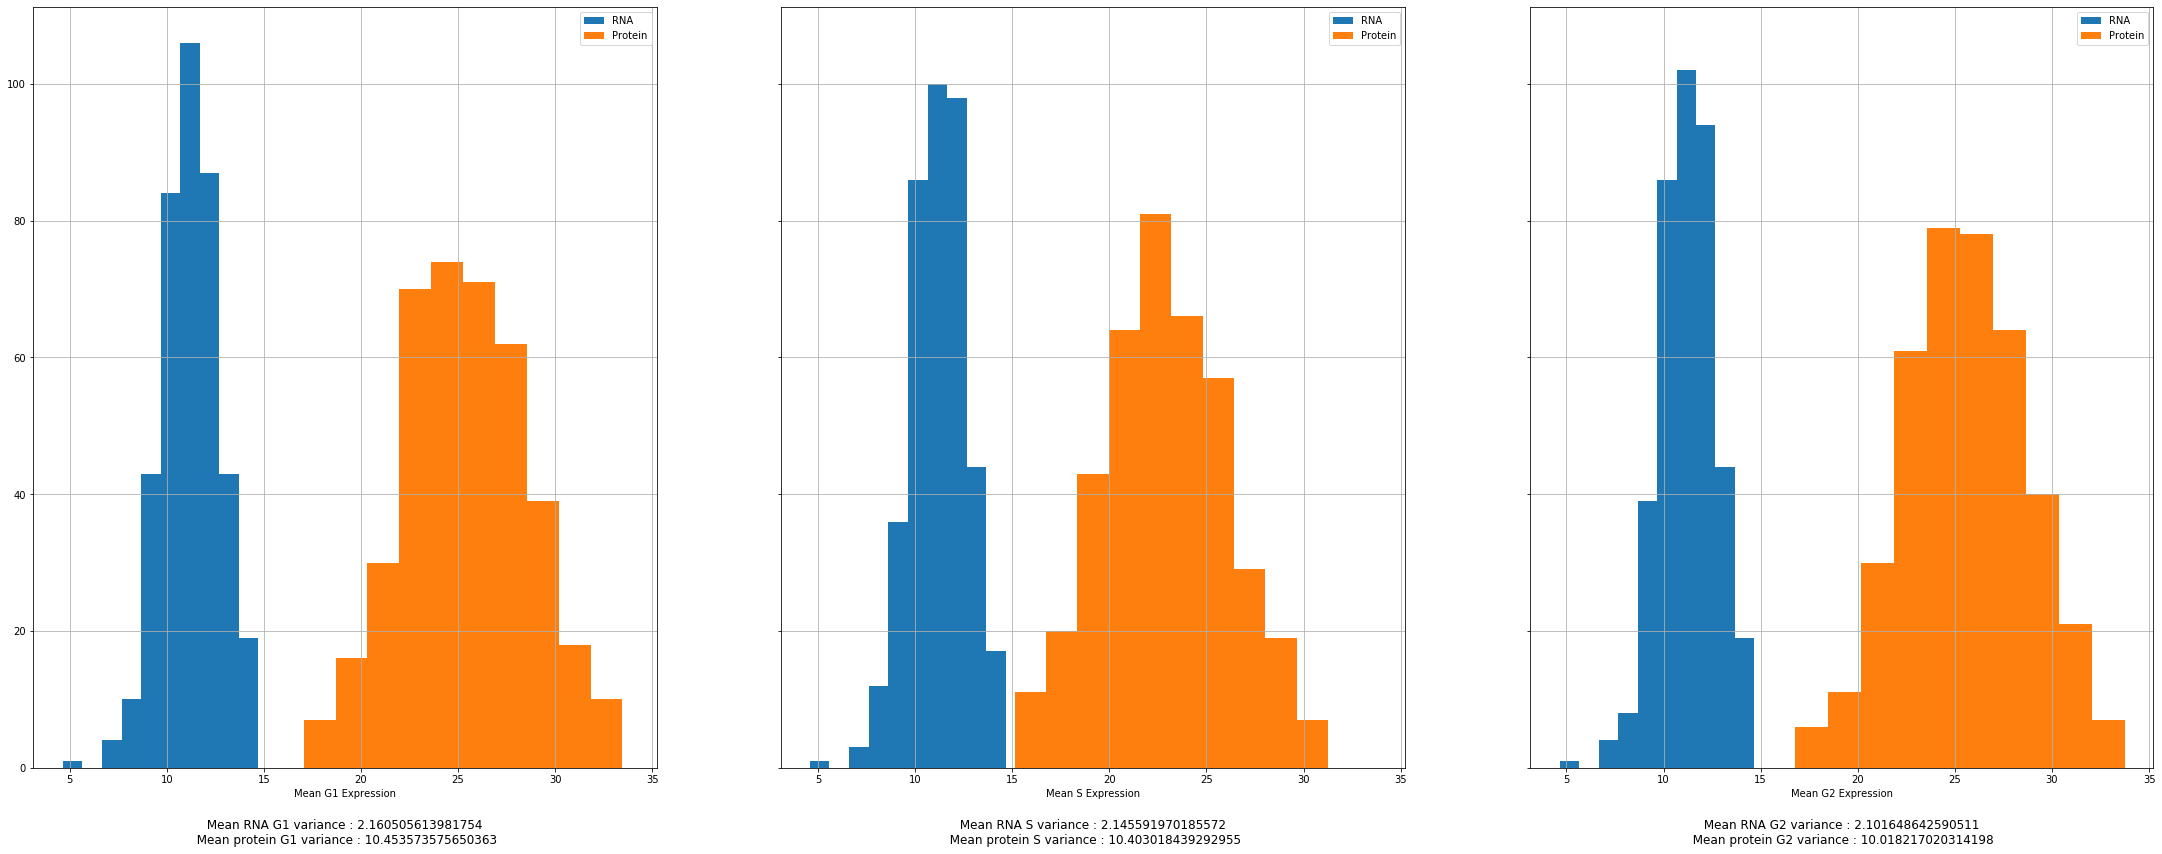

In [67]:
# original code
# fig1, ax1 = plt.subplots()
# df.mean_RNA_G1.hist(ax=ax1, label='RNA')
# df.mean_protein_G1.hist(ax=ax1, label='Protein')
# ax1.legend()
# ax1.set_xlabel('Mean G1 Expression')
# fig1

# create subplot regions
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(38,14))

# create fig 1
df.mean_RNA_G1.hist(ax=ax1, label='RNA')
df.mean_protein_G1.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G1 Expression')

# create fig 2
df.mean_RNA_S.hist(ax=ax2, label='RNA')
df.mean_protein_S.hist(ax=ax2, label='Protein')
ax2.legend()
ax2.set_xlabel('Mean S Expression')

# create fig 3
df.mean_RNA_G2.hist(ax=ax3, label='RNA')
df.mean_protein_G2.hist(ax=ax3, label='Protein')
ax3.legend()
ax3.set_xlabel('Mean G2 Expression')

# add text describing mean and variance
ax1.text(0.5,-0.1, """ Mean RNA G1 variance : {} \n  Mean protein G1 variance : {} """.format(str(df.mean_RNA_G1.var()), str(df.mean_protein_G1.var())), size=12, ha="center", 
         transform=ax1.transAxes)

ax2.text(0.5,-0.1, """ Mean RNA S variance : {} \n  Mean protein S variance : {} """.format(str(df.mean_RNA_S.var()), str(df.mean_protein_S.var())), size=12, ha="center", 
         transform=ax2.transAxes)

ax3.text(0.5,-0.1, """ Mean RNA G2 variance : {} \n  Mean protein G2 variance : {} """.format(str(df.mean_RNA_G2.var()), str(df.mean_protein_G2.var())), size=12, ha="center", 
         transform=ax3.transAxes)

plt.show()
# fig1, ax1 = plt.subplots()
# dfCellCycle = df[['mean_RNA_G1', 'mean_protein_G1', 'GOBP']]
# dfCellCycle = dfCellCycle[dfCellCycle['GOBP'].str.contains('cell cycle')]
# dfCellCycle.mean_RNA_G1.hist(ax=ax1, label='RNA')
# dfCellCycle.mean_protein_G1.hist(ax=ax1, label='Protein')
# ax1.legend()
# ax1.set_xlabel('Mean G1 Expression')

## Task 2

Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function). Does the change in timestep have much effect on the relationship(s) between RNA and protein?

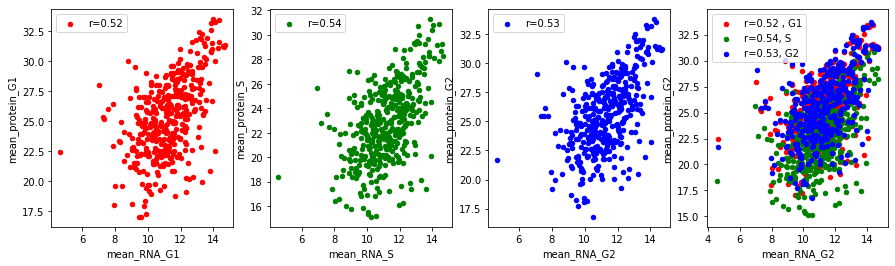

In [68]:
fig2, ax2 = plt.subplots(ncols=4, figsize=(15,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[0], color='r', label='r={:0.2f}'.format(
            pearsonr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[1], color='g', label='r={:0.2f}'.format(
            pearsonr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[2], color='b', label='r={:0.2f}'.format(
            pearsonr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
# plt.show()
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[3], color='r', label='r={:0.2f} , G1'.format(
            pearsonr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[3], color='g', label='r={:0.2f}, S'.format(
            pearsonr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[3], color='b', label='r={:0.2f}, G2'.format(
            pearsonr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
plt.show()

## Task 3 

Generate a scatterplot of the RNA versus. protein for each cell cycle stage. Fit a linear model to the data, can we infer protein concentration from RNA concentration?

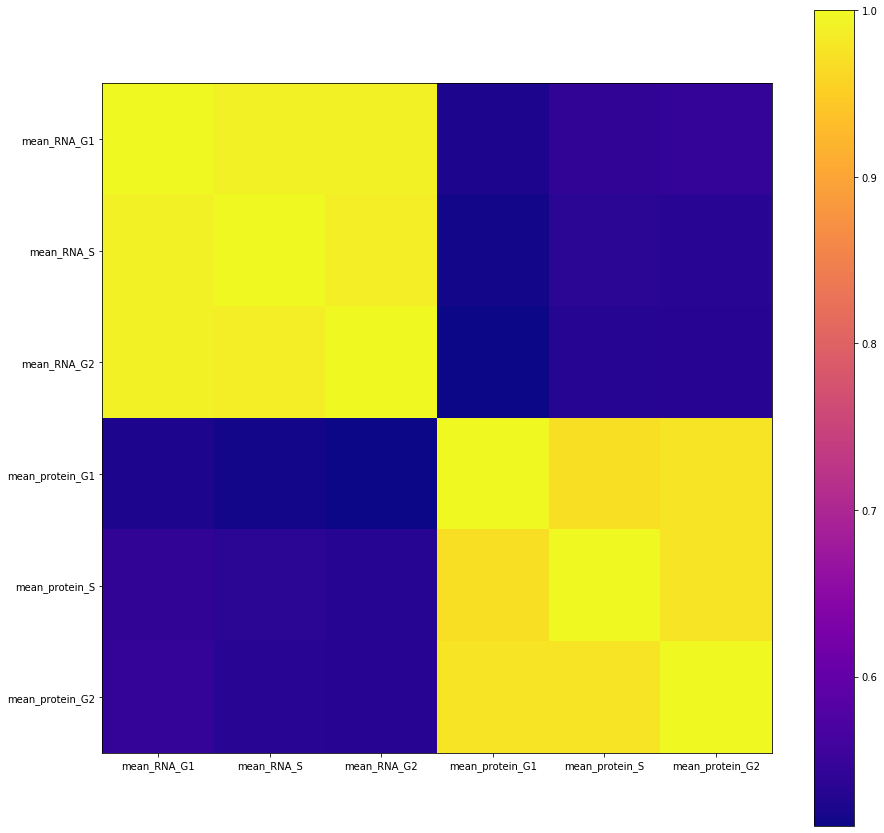

In [69]:
#use ml to do 80 - 20 prediction 
from matplotlib.pyplot import figure
fig3,ax3 = plt.subplots(figsize=(15,15))
cax = ax3.imshow(df.corr(), cmap='plasma')
ax3.set_xticklabels(df.columns)
ax3.set_yticklabels(df.columns)
fig3.colorbar(cax)
plt.show()

accuracy score
0.27175338556052386


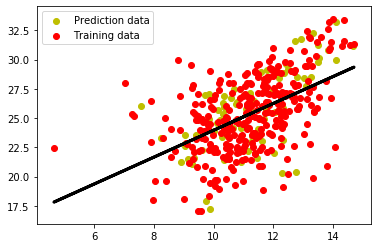

In [70]:
from sklearn.metrics import accuracy_score
regr_g1 = LinearRegression()
regr_g2 = LinearRegression()
regr_s = LinearRegression()
x_train1 = df.mean_RNA_G1.to_numpy().reshape(-1,1)
y_train1 = df.mean_protein_G1.to_numpy().reshape(-1,1)
data = list(zip(x_train1,y_train1))
random.shuffle(data)
x_train1, y_train1 = zip(*data)

x_train1 = np.asarray(x_train1)
y_train1 = np.asarray(y_train1)

t1 = int(x_train1.size*0.8)
t2 = int(y_train1.size*0.8)
regr_g1.fit(x_train1[:t1], y_train1[:t2])

y_pred1 = regr_g1.predict(x_train1[t1:])
# print(y_pred1)

print("accuracy score")
regr_g4 = LinearRegression()
regr_g4.fit(x_train1, y_train1)
y_pred5 = regr_g4.predict(x_train1)
print(regr_g1.score(x_train1,y_train1))
plt.scatter(x_train1[t1:], y_train1[t2:], color='y',label= "Prediction data")
plt.scatter(x_train1[:t1], y_train1[:t2],  color='r', label= "Training data")
plt.plot(x_train1, y_pred5, color='black', linewidth=3)
plt.legend()
plt.show()

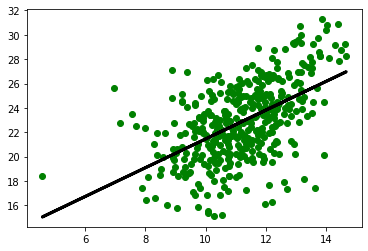

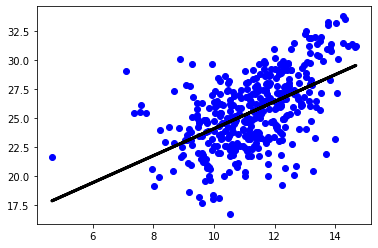

In [71]:
x_train2 = df.mean_RNA_S.to_numpy().reshape(-1,1)
y_train2 = df.mean_protein_S.to_numpy().reshape(-1,1)
regr_s.fit(x_train2, y_train2)
y_pred2 = regr_s.predict(x_train2)
# print(y_pred2[:10])
plt.scatter(x_train2, y_train2,  color='g')
plt.plot(x_train2, y_pred2, color='black', linewidth=3)
plt.show()


x_train3 = df.mean_RNA_G2.to_numpy().reshape(-1,1)
y_train3 = df.mean_protein_G2.to_numpy().reshape(-1,1)
regr_g2.fit(x_train3, y_train3)
y_pred3 = regr_g2.predict(x_train3)
# print(y_pred3[:10])
plt.scatter(x_train3, y_train3,  color='b')
plt.plot(x_train3, y_pred3, color='black', linewidth=3)
plt.show()

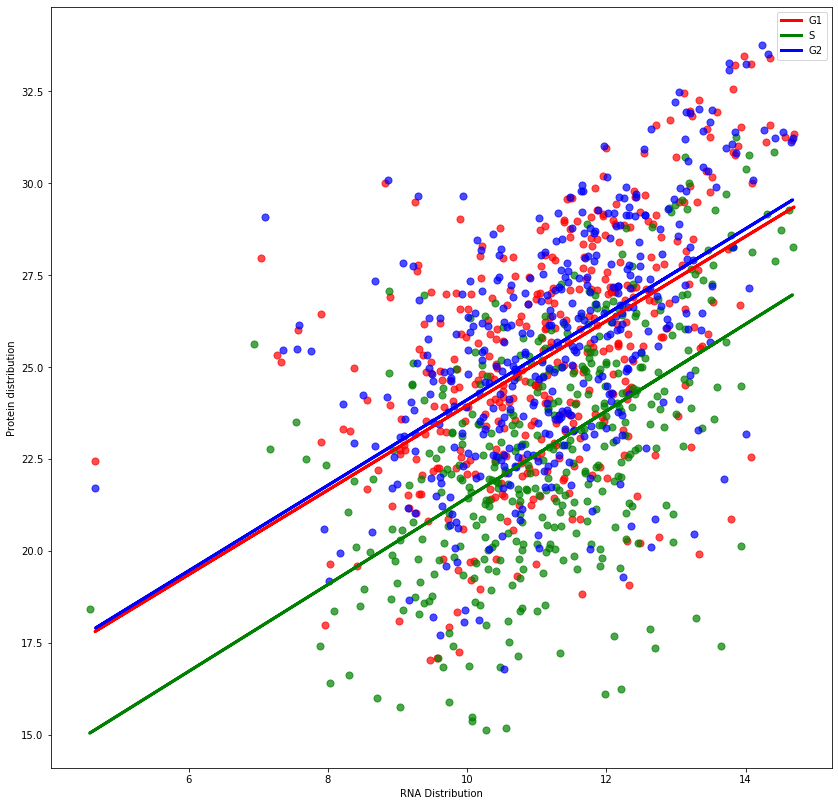

In [72]:
plt.figure(figsize=(14,14))
x_train4 = df.mean_RNA_G2.to_numpy().reshape(-1,1)
y_train4 = df.mean_protein_G2.to_numpy().reshape(-1,1)
plt.scatter(x_train1, y_train1,  color='r', s=50., alpha=.7,)
plt.scatter(x_train2, y_train2,  color='g', s=50., alpha=.7,)
plt.scatter(x_train4, y_train4,  color='b', s=50., alpha=.7,)
plt.plot(x_train1, y_pred5, color='red', linewidth=3,label = 'G1')
plt.plot(x_train2, y_pred2, color='green', linewidth=3,label = 'S')
plt.plot(x_train3, y_pred3, color='blue', linewidth=3,label = 'G2')
plt.xlabel('RNA Distribution')
plt.ylabel('Protein distribution')
plt.legend()
plt.show()




# Week 2

## Task 1

Find all genes that contain 'cell cycle' in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase. Is there a stronger/weaker correlation?

71


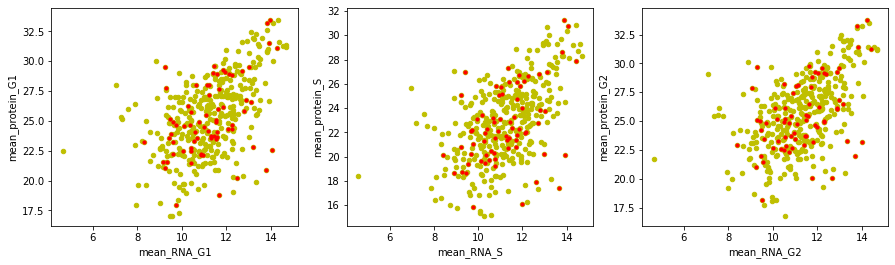

In [73]:
gobp = df[df.GOBP.str.contains('cell cycle')]
fig4,ax4 = plt.subplots(ncols=3, figsize=(15,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='y')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='y')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='y')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
print(len(gobp))
# fig4

## Task 2

71


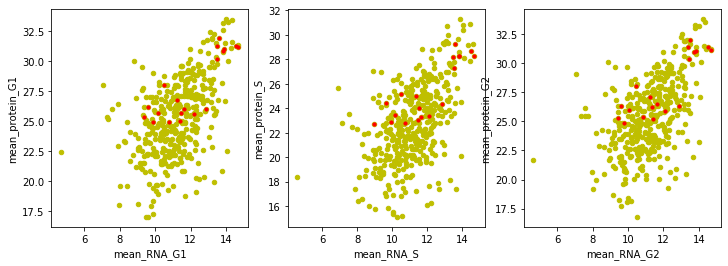

In [74]:
gocc = df[df.GOCC.str.contains('ribosome')]
fig5,ax5 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='y')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='y')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='y')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)
print(len(gobp))
# fig5

## Task 3

Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?

In [75]:
print(df.GOBP.str.split(';',expand=True).stack().value_counts())

cellular process                                377
metabolic process                               273
cellular metabolic process                      260
primary metabolic process                       255
biological regulation                           236
                                               ... 
renal inner medulla development                   1
spindle midzone assembly involved in mitosis      1
positive regulation of macrophage fusion          1
bradykinin catabolic process                      1
myeloid leukocyte differentiation                 1
Length: 2854, dtype: int64


## Task 4

Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling. Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling. What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?

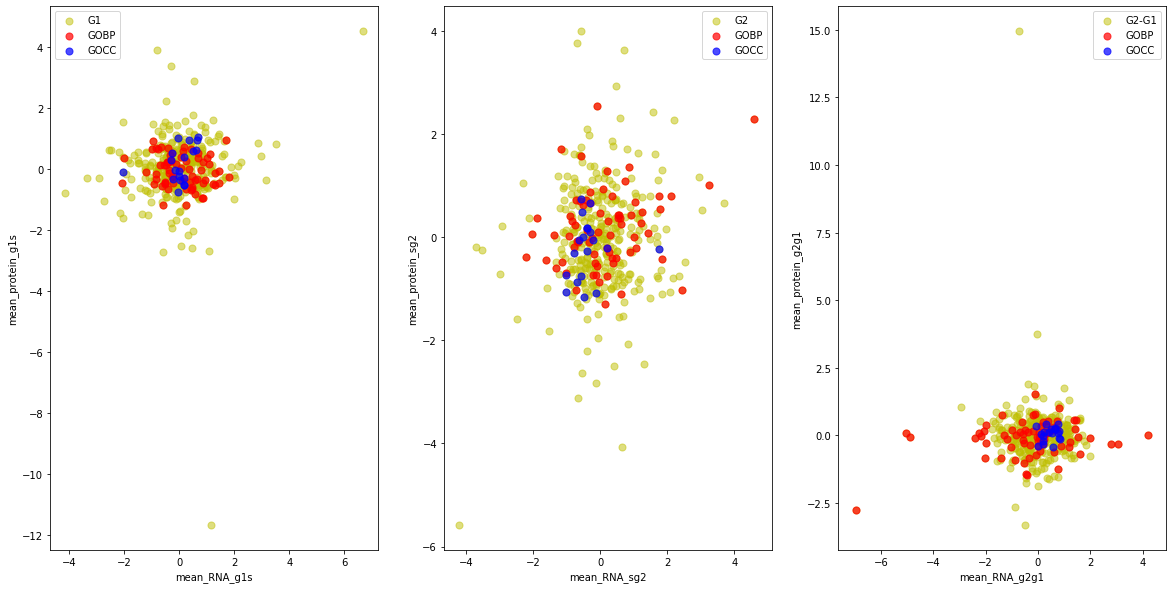

In [76]:
df['mean_RNA_g1s'] = (df.mean_RNA_S - df.mean_RNA_G1)
df['mean_RNA_sg2'] = (df.mean_RNA_G2 - df.mean_RNA_S)
df['mean_RNA_g2g1'] = (df.mean_RNA_G1 - df.mean_RNA_G2)
df['mean_protein_g1s'] = (df.mean_protein_S - df.mean_protein_G1)
df['mean_protein_sg2'] = (df.mean_protein_G2 - df.mean_protein_S)
df['mean_protein_g2g1'] = (df.mean_protein_G1 - df.mean_protein_G2)

# standardise
df.iloc[:,-6:] = (df.iloc[:,-6:] - df.iloc[:,-6:].mean(axis=0)) / df.iloc[:,-6:].std(axis=0)

gobp = df[df.GOBP.str.contains('cell cycle')]
gocc = df[df.GOCC.str.contains('ribosome')]
fig6,ax6 = plt.subplots(ncols=3, figsize=(20,10))
df.plot.scatter('mean_RNA_g1s', 'mean_protein_g1s', ax=ax6[0], s=50., color='y', alpha=.5, label = "G1")
df.plot.scatter('mean_RNA_sg2', 'mean_protein_sg2', ax=ax6[1], s=50.,color='y',alpha=.5, label = "G2")
df.plot.scatter('mean_RNA_g2g1', 'mean_protein_g2g1', ax=ax6[2], s=50.,color='y', alpha=.5, label = "G2-G1")
ax6[0].scatter(gobp.mean_RNA_g1s, gobp.mean_protein_g1s, color='r', s=50., alpha=.7, label = "GOBP")

ax6[1].scatter(gobp.mean_RNA_sg2, gobp.mean_protein_sg2, color='r', s=50., alpha=.7, label = "GOBP")
ax6[2].scatter(gobp.mean_RNA_g2g1, gobp.mean_protein_g2g1, color='r', s=50., alpha=.7, label = "GOBP")

ax6[0].scatter(gocc.mean_RNA_g1s, gocc.mean_protein_g1s, color='b', s=50., alpha=.7, label = "GOCC")

ax6[1].scatter(gocc.mean_RNA_sg2, gocc.mean_protein_sg2, color='b', s=50., alpha=.7, label = "GOCC")
ax6[2].scatter(gocc.mean_RNA_g2g1, gocc.mean_protein_g2g1, color='b', s=50., alpha=.7, label = "GOCC")

ax6[0].legend()
ax6[1].legend()
ax6[2].legend()
# fig6


